Aim: check the approximations doen to perform the decompostion of the horizontal advection

In [1]:
import os,sys
import numpy as np
# xarray
import xarray as xr

from dask.distributed import Client
c = Client()


In [31]:
# ------------------------
# loading data
# ------------------------
chunk_size = {"x":500,"y":500}
prefix = "eORCA025.L75-IMHOTEP"
fo="1d" # frequency used
year ="1999" 
maskBG = xr.open_dataset('/gpfswork/rech/cli/uor98hu/MYDATA/TRANSPORT_WP1/polymask2.nc',chunks=chunk_size).polymask.squeeze()

nexp="GAI"
diridatref="/gpfsstore/rech/cli/rcli002/eORCA025.L75/"+prefix+"."+nexp+"-S/"
listUfiles=diridatref+"1d/"+year+"-concat/*1d_gridU.nc"
listVfiles=diridatref+"1d/"+year+"-concat/*1d_gridV.nc"
listTfiles=diridatref+"1d/"+year+"-concat/*1d_gridT.nc"

GAI_U_ds= xr.open_mfdataset(listUfiles, chunks=chunk_size,parallel=True)
GAI_V_ds = xr.open_mfdataset(listVfiles, chunks=chunk_size,parallel=True)
GAI_T_ds = xr.open_mfdataset(listTfiles, chunks=chunk_size,parallel=True)

nexp="AI"
diridatref="/gpfsstore/rech/cli/rcli002/eORCA025.L75/"+prefix+"."+nexp+"-S/"
listUfiles=diridatref+"1d/"+year+"-concat/*1d_gridU.nc"
listVfiles=diridatref+"1d/"+year+"-concat/*1d_gridV.nc"
listTfiles=diridatref+"1d/"+year+"-concat/*1d_gridT.nc"

AI_U_ds= xr.open_mfdataset(listUfiles, chunks=chunk_size,parallel=True)
AI_V_ds = xr.open_mfdataset(listVfiles, chunks=chunk_size,parallel=True)
AI_T_ds = xr.open_mfdataset(listTfiles, chunks=chunk_size,parallel=True)

In [39]:
# vérivication de facteurs d'échelle
GAI_e3u = GAI_U_ds.e3u.where(maskBG,drop=True)
GAI_e3v = GAI_V_ds.e3v.where(maskBG,drop=True)
AI_e3u = AI_U_ds.e3u.where(maskBG,drop=True)
AI_e3v = AI_V_ds.e3v.where(maskBG,drop=True)
GAI_e3t = GAI_T_ds.e3t.where(maskBG,drop=True)
AI_e3t = AI_T_ds.e3t.where(maskBG,drop=True)

In [40]:
diff_e3u = GAI_e3u - AI_e3u
diff_e3v = GAI_e3v - AI_e3v
diff_e3t = GAI_e3t - AI_e3t

In [42]:
diff_e3u = diff_e3u.compute()

In [43]:
diff_e3u.max().values

array(0.00254822, dtype=float32)

(array([1.1440000e+03, 2.0066000e+04, 1.0781400e+05, 5.8495100e+05,
        1.6429750e+06, 2.9097540e+06, 1.9486572e+07, 9.8266200e+05,
        1.2114400e+05, 1.2293000e+04]),
 array([-5.7373047e-03, -4.9087526e-03, -4.0802001e-03, -3.2516480e-03,
        -2.4230957e-03, -1.5945435e-03, -7.6599122e-04,  6.2561034e-05,
         8.9111330e-04,  1.7196655e-03,  2.5482178e-03], dtype=float32),
 <BarContainer object of 10 artists>)

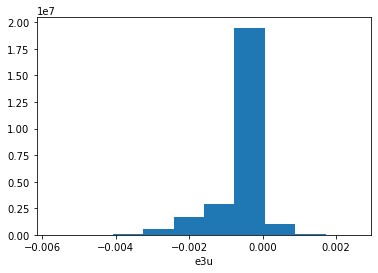

In [44]:
diff_e3u.plot.hist()

In [46]:
diff_e3v = diff_e3v.compute()

In [47]:
diff_e3v.max().values

array(0.00254822, dtype=float32)

(array([1.1850000e+03, 2.0755000e+04, 1.1051100e+05, 5.7745000e+05,
        1.6319130e+06, 2.8902340e+06, 1.9456439e+07, 1.0383630e+06,
        1.2976500e+05, 1.2760000e+04]),
 array([-5.7220459e-03, -4.8950193e-03, -4.0679933e-03, -3.2409667e-03,
        -2.4139404e-03, -1.5869141e-03, -7.5988768e-04,  6.7138673e-05,
         8.9416502e-04,  1.7211915e-03,  2.5482178e-03], dtype=float32),
 <BarContainer object of 10 artists>)

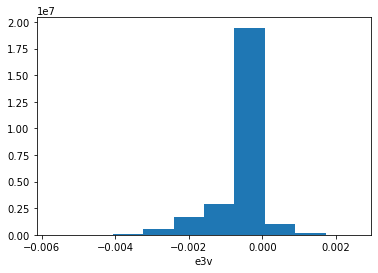

In [48]:
diff_e3v.plot.hist()

In [57]:
diff_e3t = diff_e3t.compute()

In [58]:
diff_e3t.max().values

array(0.00256348, dtype=float32)

(array([9.7100000e+02, 1.8702000e+04, 1.0287700e+05, 5.5373000e+05,
        1.5958380e+06, 2.8820670e+06, 1.9503575e+07, 1.0750170e+06,
        1.2512100e+05, 1.1477000e+04]),
 array([-5.7983398e-03, -4.9621584e-03, -4.1259765e-03, -3.2897950e-03,
        -2.4536133e-03, -1.6174316e-03, -7.8125001e-04,  5.4931639e-05,
         8.9111330e-04,  1.7272949e-03,  2.5634766e-03], dtype=float32),
 <BarContainer object of 10 artists>)

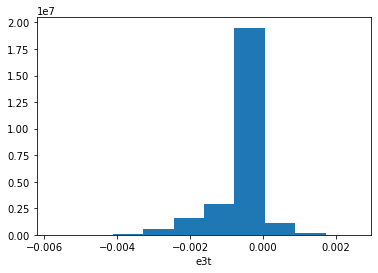

In [59]:
diff_e3t.plot.hist()

(array([10692675.,  2092180.,  1413280.,  1081495.,  1104489.,   758836.,
         1115805.,  1159605.,  1886252.,  4564758.]),
 array([  1.0237161,  21.296421 ,  41.569126 ,  61.84183  ,  82.11453  ,
        102.38724  , 122.65994  , 142.93265  , 163.20535  , 183.47806  ,
        203.75076  ], dtype=float32),
 <BarContainer object of 10 artists>)

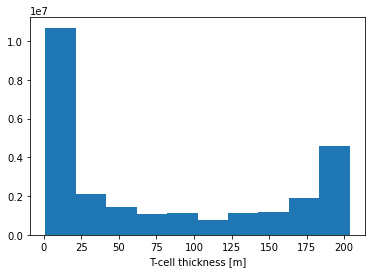

In [61]:
GAI_e3t.plot.hist()

# calcul de Ug

In [56]:
GAI_U = GAI_U_ds.vozocrtx
AI_U = AI_U_ds.vozocrtx

GAI_V = GAI_V_ds.vomecrty
AI_V = AI_V_ds.vomecrty

Ug = GAI_U - AI_U
Vg = GAI_V - AI_V